<h1> Precipitation data - Location is truncated </h1>

<p>Script to extract raw rainfall data (in inches per month) from Ed Hawkins Rainfall Rescue Github. 1900s decade folder.
</p>


<h2>Load modules</h2>

In [ ]:
#<h4>Need webscraping so install Beautiful Soup</h4>

In [ ]:
#!conda install conda-forge::beautifulsoup4 -y

In [1]:
import xarray as xr
print('Imported Xarray')
import numpy as np
print('Imported numpy')
import scipy.stats as stats
print('Imported scipy.stats')
import matplotlib.pyplot as plt
print('Imported matplotlib')
import cftime
print('Imported cftime')
import math
print('Imported math')
import pandas as pd
print('Imported pandas')
from bs4 import BeautifulSoup
print('Imported BeautifulSoup')
import requests
import time
import re
from requests.auth import HTTPBasicAuth
import csv

Imported Xarray
Imported numpy
Imported scipy.stats
Imported matplotlib
Imported cftime
Imported math
Imported pandas
Imported BeautifulSoup


<h2>Open Monthly Precipitation Data</h2>

<p>Data is all on GitHub - each pdf page as a as single .csv file. Data file layout and encoding is explained on the <a href='https://github.com/ed-hawkins/rainfall-rescue/blob/master/schema.md'>schema page</a>.</p>

In [2]:
##Isolate all urls containing .csv files on monthly rainfall data

url = 'https://github.com/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS'
stringmatch = 'ALLSHEETS/1'
all_data_parent_urls=[]

response = requests.get(url)
time.sleep(1)
soup = BeautifulSoup(response.content, 'html.parser')
for link in soup.findAll('a', href=True):
    if stringmatch in link.get('href'):
        #print(link.get('href'))
        all_data_parent_urls.append(link.get('href')) 

In [3]:
##should have 15 unique parent urls
all_data_parent_urls=list(set(all_data_parent_urls))
len(all_data_parent_urls)

15

In [4]:
all_data_parent_urls

['/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1870s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1930s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1890s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1940s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1950s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1840s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1880s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1820s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1920s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1830s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1900s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1850s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1677s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1860s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1910s']

<h2>Create text files containing all the possible file names</h2>

<h3>1900s</h3>

In [5]:
DECADE=str('1900s')

In [7]:
##there is probably a better way to index the needed url, I just counted and manually entered the index. 
url='https://github.com'+str(all_data_parent_urls[10])
print('Manually Check for truncating '+str(url))

Manually Check for truncating https://github.com/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1900s


<p> Sorry, we had to <b>truncate this directory to 1,000 files</b>. 5,974 entries were omitted from the list. Latest commit info may be omitted.
<br>So 1900s contains <b>6974 files</b>. Use met office source pdfs to create list of possible .csv files </p>

<h4>Create list with all urls that contain the relevant pdfs</h4>

In [8]:
##Create a met office url for each page of file locations
num_pages=np.arange(1,3,1)
urls=[]

for i in num_pages:
    urls.append('https://digital.nmla.metoffice.gov.uk/SO_ef327d45-47df-475e-8688-82f75297218f/?pg='+str(i))

In [9]:
urls

['https://digital.nmla.metoffice.gov.uk/SO_ef327d45-47df-475e-8688-82f75297218f/?pg=1',
 'https://digital.nmla.metoffice.gov.uk/SO_ef327d45-47df-475e-8688-82f75297218f/?pg=2']

In [10]:
##Get all parent file names
stringmatch='TYRain_'
parent_files=[]

for url in urls:
    print('Sourcing from: '+str(url))
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    for link in soup.findAll('a', href=True):
        if stringmatch in link.get_text():
            print(link.get_text())
            parent_files.append(link.get_text()) 

Sourcing from: https://digital.nmla.metoffice.gov.uk/SO_ef327d45-47df-475e-8688-82f75297218f/?pg=1
TYRain_1900-1909_01_pt1
TYRain_1900-1909_02_pt1
TYRain_1900-1909_03_pt1
TYRain_1900-1909_04_pt1
TYRain_1900-1909_05_pt1
TYRain_1900-1909_06_pt1
TYRain_1900-1909_07_pt1
TYRain_1900-1909_08_pt1
TYRain_1900-1909_09_pt1
TYRain_1900-1909_10_pt1
TYRain_1900-1909_11_pt1
TYRain_1900-1909_12_pt1
TYRain_1900-1909_13_pt1
TYRain_1900-1909_14_pt1
TYRain_1900-1909_15_pt1
TYRain_1900-1909_16_pt1
TYRain_1900-1909_17_pt1
TYRain_1900-1909_18_pt1
TYRain_1900-1909_19_pt1
TYRain_1900-1909_20_pt1
Sourcing from: https://digital.nmla.metoffice.gov.uk/SO_ef327d45-47df-475e-8688-82f75297218f/?pg=2
TYRain_1900-1909_21_pt1
TYRain_1900-1909_22_pt1
TYRain_1900-1909_23_pt1
TYRain_1900-1909_24_pt1
TYRain_1900-1909_25_pt1
TYRain_1900-1909_26_pt1
TYRain_1900-1909_27_pt1
TYRain_1900-1909_28_pt1
TYRain_1900-1909_29_pt1
TYRain_1900-1909_30_pt1
TYRain_1900-1909_31_pt1
TYRain_1900-1909_32_pt1


<h4>Create list with possible raw data locations</h4>

In [11]:
######Largest file is 287 pages 

In [12]:
filenames_1900s=[]

for i in range(len(parent_files)):
    for j in np.arange(1,289,1):
        filenames_1900s.append(str(parent_files[i])+'-%s.csv' % j)

In [13]:
len(filenames_1900s)

9216

In [14]:
raw_parent_string='https://raw.githubusercontent.com/ed-hawkins/rainfall-rescue/master/ALLSHEETS/'

In [15]:
##All possible filenames
raw_urls_1900s_all=[str(raw_parent_string)+str(DECADE)+'/'+str(i) for i in filenames_1900s]

In [16]:
#raw_urls_1900s_all

In [17]:
raw_urls_1900s_all[976]

'https://raw.githubusercontent.com/ed-hawkins/rainfall-rescue/master/ALLSHEETS/1900s/TYRain_1900-1909_04_pt1-113.csv'

<h4>Remove raw data locations that dont exist</h4>

In [18]:
##remove filenames that dont actually exist
##Due to large volume of requests being sent use auth and build in sleep if/when rate limiting is hit
errors=[]
for i in range(len(raw_urls_1900s_all)):
    try:
        response=requests.get(raw_urls_1900s_all[i],auth=HTTPBasicAuth('YOURUSERNAME', 'YOURAUTH'))
        response.raise_for_status()
    except Exception as e:
        ##if rate limited wait an hour
        if response.status_code == 429:
            print('5000 requests hit, sleep for an hour')
            time.sleep(60)
        #if doesnt exist then collect the filename
        if response.status_code == 404:
            errors.append(raw_urls_1900s_all[i])
        #if something weird has happened then let me know
        else:
            print('Error unaccounted for: code '+str(response.status_code)+' . Url: '+str(raw_urls_1900s_all[i]))

In [19]:
##should be about 3000 blank pages
len(errors)

2242

In [20]:
##collate raw locations that exist

In [21]:
#create clean raw list - no empty hits contained
raw_urls_1900s=[i for i in raw_urls_1900s_all if i not in errors]

In [22]:
###confident all files have been found
len(raw_urls_1900s)

6974

<h4>Save this</h4>

In [23]:
##save this as a csv file

In [24]:
np.savetxt('raw_urls_1900s.csv',raw_urls_1900s,delimiter =',',fmt ='% s')

In [25]:
# #tidy up large unneeded lists
# del raw_urls_1900s_all, errors, filenames_1900s

In [26]:
# raw_urls_1900s[-100:]

<h4>Open the raw data and collate it into a single dataframe for the entire decade</h4>

In [27]:
##Open the raw urls and convert to list
raw_urls_1900s=pd.read_csv('raw_urls_1900s.csv',header=None,delimiter =',')
raw_urls_1900s=[i for i in raw_urls_1900s[0]]

In [28]:
len(raw_urls_1900s)

6974

In [29]:
## Collect up all raw data for this decade
##**this cell takes half an hour to run**

In [30]:
##create a dataframe with the rainfall monthly csv data (not total or diffs)
all_raw_data_1900s=[]

for url in raw_urls_1900s:
    df = pd.read_csv(url,skiprows=3,nrows=12,header=1,index_col=0,delimiter=',',usecols=[0,1,2,3,4,5,6,7,8,9,10])
    all_raw_data_1900s.append(df)

In [31]:
len(all_raw_data_1900s)

6974

In [32]:
all_raw_data_1900s[-1]

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909
January,3.00,4.97,3.63,7.25,5.66,4.16,7.70,3.64,5.50,6.44
February,3.15,2.57,1.66,5.89,3.82,4.36,4.93,4.49,4.35,4.28
March,1.00,5.23,3.18,6.84,2.28,5.26,4.22,5.70,6.27,4.87
April,2.50,3.89,2.78,1.93,3.60,2.79,3.76,3.28,2.86,4.26
May,2.75,2.27,4.46,3.24,2.51,1.41,3.07,5.06,2.90,2.93
June,3.75,4.57,1.81,0.84,1.17,3.77,1.20,4.69,2.63,1.48
July,2.75,2.69,3.50,4.64,4.85,2.04,2.17,2.47,3.16,3.80
August,3.35,5.06,3.11,7.33,6.28,5.27,4.48,5.35,3.74,3.25
September,3.15,4.74,4.51,3.61,2.79,3.00,2.33,2.03,6.93,2.65
October,5.51,5.03,3.14,8.31,2.72,2.70,5.34,5.33,1.34,6.69


In [33]:
#all_raw_data_1900s[2400:2401]

In [34]:
##collect up all the years
grouped_by_yr_1900s=pd.concat(all_raw_data_1900s, axis=0, ignore_index=False)

In [35]:
#put the month as a new index
grouped_by_yr_1900s.reset_index(inplace=True)

In [36]:
grouped_by_yr_1900s=grouped_by_yr_1900s.rename(columns={'index': 'MONTH'})
grouped_by_yr_1900s

,MONTH,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909
0,January,NaN,NaN,NaN,NaN,NaN,0.96,3.40,0.67,1.17,0.42
1,February,NaN,NaN,NaN,NaN,NaN,0.48,1.33,0.92,1.11,0.54
2,March,NaN,NaN,NaN,NaN,NaN,3.10,0.67,0.72,1.70,1.95
3,April,NaN,NaN,NaN,NaN,NaN,1.31,0.63,2.93,1.53,1.23
4,May,NaN,NaN,NaN,NaN,NaN,0.70,1.12,1.46,1.53,0.95
...,...,...,...,...,...,...,...,...,...,...,...
83683,August,3.35,5.06,3.11,7.33,6.28,5.27,4.48,5.35,3.74,3.25
83684,September,3.15,4.74,4.51,3.61,2.79,3.00,2.33,2.03,6.93,2.65
83685,October,5.51,5.03,3.14,8.31,2.72,2.70,5.34,5.33,1.34,6.69
83686,November,5.67,5.80,4.35,3.73,4.94,5.96,4.95,4.07,4.38,3.32


In [37]:
#Group data into lists organised by month and year
grouped_by_monthyr_1900s=grouped_by_yr_1900s.groupby('MONTH').agg(list)
grouped_by_monthyr_1900s

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909
MONTH,,,,,,,,,,
April,"[nan, nan, 0.83, nan, nan, 0.72, nan, 0.86, 0....","[nan, nan, 1.73, nan, nan, 1.9, nan, 1.76, nan...","[nan, nan, 0.5, nan, nan, 0.48, nan, 0.47, nan...","[nan, nan, 1.91, nan, nan, 2.02, nan, 2.06, na...","[nan, nan, 1.19, nan, nan, 1.38, 1.16, nan, na...","[1.31, nan, 1.68, 1.85, nan, 1.58, 1.55, nan, ...","[0.63, nan, 0.68, 0.82, nan, nan, 0.67, nan, n...","[2.93, nan, 3.47, 4.06, nan, nan, 3.22, nan, n...","[1.53, nan, 2.31, 2.57, nan, nan, 2.15, nan, n...","[1.23, nan, 1.87, 1.66, 1.43, nan, 1.5, nan, n..."
August,"[nan, nan, 3.34, nan, nan, 3.25, nan, 3.47, 2....","[nan, nan, 2.02, nan, nan, 2.2, nan, 2.04, nan...","[nan, nan, 3.29, nan, nan, 2.75, nan, 2.82, na...","[nan, nan, 4.23, nan, nan, 4.62, nan, 4.9, nan...","[1.28, nan, 1.78, 1.83, nan, 1.71, 1.58, nan, ...","[2.14, nan, 2.71, 3.72, nan, 3.25, 3.0, nan, n...","[0.94, nan, 0.81, 1.01, nan, nan, 0.71, nan, n...","[1.67, nan, 2.18, 2.33, nan, nan, 1.88, nan, n...","[2.5, nan, 3.58, 3.94, nan, nan, 2.99, nan, na...","[1.47, nan, 2.09, 1.93, 1.41, nan, 1.62, nan, ..."
December,"[nan, nan, 2.32, nan, nan, 2.24, nan, 2.31, 2....","[nan, nan, 3.27, nan, nan, 3.1, nan, 3.08, nan...","[nan, nan, 1.46, nan, nan, 1.39, nan, 1.29, na...","[nan, nan, 1.33, nan, nan, 1.31, nan, 1.3, nan...","[1.7, nan, 2.14, 2.52, nan, 2.12, 1.96, nan, n...","[0.49, nan, 0.61, 0.63, nan, 0.62, 0.54, nan, ...","[1.45, nan, 2.15, 2.64, nan, nan, 2.01, nan, n...","[2.54, nan, 2.71, 3.17, nan, nan, 3.05, nan, n...","[1.52, nan, 2.12, 2.55, nan, nan, 1.74, nan, n...","[1.84, nan, 2.53, 2.52, 2.12, nan, 2.18, nan, ..."
February,"[nan, nan, 4.5, nan, nan, 3.83, nan, 3.57, 3.5...","[nan, nan, 1.06, nan, nan, 0.98, nan, 0.91, na...","[nan, nan, 0.7, nan, nan, 0.83, nan, 0.9, nan,...","[nan, nan, 1.37, nan, nan, 1.13, nan, 1.05, na...","[nan, nan, 2.4, nan, nan, 2.55, nan, nan, nan,...","[0.48, nan, 0.83, 0.67, nan, 0.72, 0.64, nan, ...","[1.33, nan, 1.81, 1.83, nan, 1.63, 1.52, nan, ...","[0.92, nan, 1.42, 1.37, nan, nan, 1.1, nan, na...","[1.11, nan, 1.3, 1.45, nan, nan, 1.37, nan, na...","[0.54, nan, 0.61, 0.68, 0.49, nan, 0.48, nan, ..."
January,"[nan, nan, 2.59, nan, nan, 2.42, nan, 2.43, 2....","[nan, nan, 0.76, nan, nan, 0.75, nan, 0.83, na...","[nan, nan, 0.65, nan, nan, 0.64, nan, 0.68, na...","[nan, nan, 2.27, nan, nan, 2.35, nan, 2.32, na...","[nan, nan, 2.65, nan, nan, 2.41, nan, nan, nan...","[0.96, nan, 1.06, 1.23, nan, 1.17, 1.05, nan, ...","[3.4, nan, 3.63, 4.05, nan, 3.69, 3.48, nan, n...","[0.67, nan, 0.92, 0.98, nan, nan, 0.7, nan, na...","[1.17, nan, 1.5, 1.32, nan, nan, 1.45, nan, na...","[0.42, nan, 1.04, 1.02, 0.75, nan, 0.72, nan, ..."
July,"[nan, nan, 1.33, nan, nan, 1.22, nan, 1.22, 1....","[nan, nan, 2.16, nan, nan, 3.21, nan, 1.75, na...","[nan, nan, 1.28, nan, nan, 1.75, nan, 1.78, na...","[nan, nan, 4.11, nan, nan, 5.2, nan, 5.18, nan...","[2.13, nan, 1.46, 1.77, nan, 1.6, 1.52, nan, n...","[0.56, nan, 0.85, 0.87, nan, 0.81, 0.67, nan, ...","[0.23, nan, 0.62, 0.65, nan, nan, 0.57, nan, n...","[1.07, nan, 0.95, 1.2, nan, nan, 1.04, nan, na...","[2.9, nan, 3.46, 4.18, nan, nan, 3.55, nan, na...","[2.58, nan, 3.36, 3.79, 3.17, nan, 3.45, nan, ..."
June,"[nan, nan, 2.78, nan, nan, 2.65, nan, 2.31, 2....","[nan, nan, 1.86, nan, nan, 1.83, nan, 1.95, na...","[nan, nan, 4.14, nan, nan, 3.59, nan, 3.6, nan...","[nan, nan, 6.55, nan, nan, 6.17, nan, 6.32, na...","[nan, nan, 0.82, nan, nan, 0.66, 0.84, nan, na...","[4.0, nan, 5.01, 6.07, nan, 4.7, 4.4, nan, nan...","[2.35, nan, 2.67, 3.62, nan, nan, 3.24, nan, n...","[1.75, nan, 2.68, 3.02, nan, nan, 2.25, nan, n...","[2.62, nan, 2.63, 3.17, nan, nan, 2.12, nan, n...","[3.12, nan, 4.33, 4.21, 3.22, nan, 3.49, nan, ..."
March,"[nan, nan, 0.89, nan, nan, 0.82, nan, 0.84, 0....","[nan, nan, 2.16, nan, nan, 2.07, nan, 1.99, na...","[nan, nan, 1.6, nan, nan, 1.62, nan, 1.7, nan,...","[nan, nan, 1.99, nan, nan, 1.98, nan, 2.15, na...","[nan, nan, 1.29, nan, nan, 1.

In [38]:
##Create a timeaxis for the decade of interest
time_ax=pd.date_range('1900-01-01', freq='M', periods=120)

In [39]:
time_ax

DatetimeIndex(['1900-01-31', '1900-02-28', '1900-03-31', '1900-04-30',
               '1900-05-31', '1900-06-30', '1900-07-31', '1900-08-31',
               '1900-09-30', '1900-10-31',
               ...
               '1909-03-31', '1909-04-30', '1909-05-31', '1909-06-30',
               '1909-07-31', '1909-08-31', '1909-09-30', '1909-10-31',
               '1909-11-30', '1909-12-31'],
              dtype='datetime64[ns]', length=120, freq='M')

In [40]:
##Extract the data from the 2D year by month into a 1D timeseries
timeseries_1900s=[]
for i in range(len(time_ax)):
    YR=time_ax[i].year
    MNTH=pd.to_datetime(time_ax[i].month, format='%m').month_name()
    #print(str(YR)+' '+str(MNTH))
    data=grouped_by_monthyr_1900s[str(YR)].loc[[str(MNTH)]].to_list()[0]
    timeseries_1900s.append(data)

In [41]:
len(timeseries_1900s)

120

In [42]:
#dummy coord for data station
dummy_loc=np.arange(len(timeseries_1900s[0]))

In [43]:
grouped_by_monthyr_1900s

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909
MONTH,,,,,,,,,,
April,"[nan, nan, 0.83, nan, nan, 0.72, nan, 0.86, 0....","[nan, nan, 1.73, nan, nan, 1.9, nan, 1.76, nan...","[nan, nan, 0.5, nan, nan, 0.48, nan, 0.47, nan...","[nan, nan, 1.91, nan, nan, 2.02, nan, 2.06, na...","[nan, nan, 1.19, nan, nan, 1.38, 1.16, nan, na...","[1.31, nan, 1.68, 1.85, nan, 1.58, 1.55, nan, ...","[0.63, nan, 0.68, 0.82, nan, nan, 0.67, nan, n...","[2.93, nan, 3.47, 4.06, nan, nan, 3.22, nan, n...","[1.53, nan, 2.31, 2.57, nan, nan, 2.15, nan, n...","[1.23, nan, 1.87, 1.66, 1.43, nan, 1.5, nan, n..."
August,"[nan, nan, 3.34, nan, nan, 3.25, nan, 3.47, 2....","[nan, nan, 2.02, nan, nan, 2.2, nan, 2.04, nan...","[nan, nan, 3.29, nan, nan, 2.75, nan, 2.82, na...","[nan, nan, 4.23, nan, nan, 4.62, nan, 4.9, nan...","[1.28, nan, 1.78, 1.83, nan, 1.71, 1.58, nan, ...","[2.14, nan, 2.71, 3.72, nan, 3.25, 3.0, nan, n...","[0.94, nan, 0.81, 1.01, nan, nan, 0.71, nan, n...","[1.67, nan, 2.18, 2.33, nan, nan, 1.88, nan, n...","[2.5, nan, 3.58, 3.94, nan, nan, 2.99, nan, na...","[1.47, nan, 2.09, 1.93, 1.41, nan, 1.62, nan, ..."
December,"[nan, nan, 2.32, nan, nan, 2.24, nan, 2.31, 2....","[nan, nan, 3.27, nan, nan, 3.1, nan, 3.08, nan...","[nan, nan, 1.46, nan, nan, 1.39, nan, 1.29, na...","[nan, nan, 1.33, nan, nan, 1.31, nan, 1.3, nan...","[1.7, nan, 2.14, 2.52, nan, 2.12, 1.96, nan, n...","[0.49, nan, 0.61, 0.63, nan, 0.62, 0.54, nan, ...","[1.45, nan, 2.15, 2.64, nan, nan, 2.01, nan, n...","[2.54, nan, 2.71, 3.17, nan, nan, 3.05, nan, n...","[1.52, nan, 2.12, 2.55, nan, nan, 1.74, nan, n...","[1.84, nan, 2.53, 2.52, 2.12, nan, 2.18, nan, ..."
February,"[nan, nan, 4.5, nan, nan, 3.83, nan, 3.57, 3.5...","[nan, nan, 1.06, nan, nan, 0.98, nan, 0.91, na...","[nan, nan, 0.7, nan, nan, 0.83, nan, 0.9, nan,...","[nan, nan, 1.37, nan, nan, 1.13, nan, 1.05, na...","[nan, nan, 2.4, nan, nan, 2.55, nan, nan, nan,...","[0.48, nan, 0.83, 0.67, nan, 0.72, 0.64, nan, ...","[1.33, nan, 1.81, 1.83, nan, 1.63, 1.52, nan, ...","[0.92, nan, 1.42, 1.37, nan, nan, 1.1, nan, na...","[1.11, nan, 1.3, 1.45, nan, nan, 1.37, nan, na...","[0.54, nan, 0.61, 0.68, 0.49, nan, 0.48, nan, ..."
January,"[nan, nan, 2.59, nan, nan, 2.42, nan, 2.43, 2....","[nan, nan, 0.76, nan, nan, 0.75, nan, 0.83, na...","[nan, nan, 0.65, nan, nan, 0.64, nan, 0.68, na...","[nan, nan, 2.27, nan, nan, 2.35, nan, 2.32, na...","[nan, nan, 2.65, nan, nan, 2.41, nan, nan, nan...","[0.96, nan, 1.06, 1.23, nan, 1.17, 1.05, nan, ...","[3.4, nan, 3.63, 4.05, nan, 3.69, 3.48, nan, n...","[0.67, nan, 0.92, 0.98, nan, nan, 0.7, nan, na...","[1.17, nan, 1.5, 1.32, nan, nan, 1.45, nan, na...","[0.42, nan, 1.04, 1.02, 0.75, nan, 0.72, nan, ..."
July,"[nan, nan, 1.33, nan, nan, 1.22, nan, 1.22, 1....","[nan, nan, 2.16, nan, nan, 3.21, nan, 1.75, na...","[nan, nan, 1.28, nan, nan, 1.75, nan, 1.78, na...","[nan, nan, 4.11, nan, nan, 5.2, nan, 5.18, nan...","[2.13, nan, 1.46, 1.77, nan, 1.6, 1.52, nan, n...","[0.56, nan, 0.85, 0.87, nan, 0.81, 0.67, nan, ...","[0.23, nan, 0.62, 0.65, nan, nan, 0.57, nan, n...","[1.07, nan, 0.95, 1.2, nan, nan, 1.04, nan, na...","[2.9, nan, 3.46, 4.18, nan, nan, 3.55, nan, na...","[2.58, nan, 3.36, 3.79, 3.17, nan, 3.45, nan, ..."
June,"[nan, nan, 2.78, nan, nan, 2.65, nan, 2.31, 2....","[nan, nan, 1.86, nan, nan, 1.83, nan, 1.95, na...","[nan, nan, 4.14, nan, nan, 3.59, nan, 3.6, nan...","[nan, nan, 6.55, nan, nan, 6.17, nan, 6.32, na...","[nan, nan, 0.82, nan, nan, 0.66, 0.84, nan, na...","[4.0, nan, 5.01, 6.07, nan, 4.7, 4.4, nan, nan...","[2.35, nan, 2.67, 3.62, nan, nan, 3.24, nan, n...","[1.75, nan, 2.68, 3.02, nan, nan, 2.25, nan, n...","[2.62, nan, 2.63, 3.17, nan, nan, 2.12, nan, n...","[3.12, nan, 4.33, 4.21, 3.22, nan, 3.49, nan, ..."
March,"[nan, nan, 0.89, nan, nan, 0.82, nan, 0.84, 0....","[nan, nan, 2.16, nan, nan, 2.07, nan, 1.99, na...","[nan, nan, 1.6, nan, nan, 1.62, nan, 1.7, nan,...","[nan, nan, 1.99, nan, nan, 1.98, nan, 2.15, na...","[nan, nan, 1.29, nan, nan, 1.

In [44]:
##Sanity Check
grouped_by_monthyr_1900s['1900'].loc[['April']].to_list()[0][7]-timeseries_1900s[3][7]

0.0

In [45]:
##Create a dataframe with time_ax as coord and 'empty' as data. 
precip_1900s=xr.DataArray(data=np.asarray(timeseries_1900s),coords={'time':time_ax,'site_index':dummy_loc},dims=['time','site_index'],name='monthly_precip',attrs={'DataSource':'Ed Hawkins Rainfall Rescue. GitHub directory for 1900s data. https://github.com/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1900s','Site_index':'Corresponds to row number of raw url from where data is sourced (raw_urls_1900s.csv).','Units':'inches/month'})

In [46]:
precip_1900s

<xarray.DataArray 'monthly_precip' (time: 120, site_index: 6974)>
array([[ nan,  nan, 2.59, ..., 5.62, 3.  , 3.  ],
       [ nan,  nan, 4.5 , ..., 2.42, 3.15, 3.15],
       [ nan,  nan, 0.89, ..., 0.97, 1.  , 1.  ],
       ...,
       [3.18,  nan, 4.16, ...,  nan,  nan, 6.69],
       [0.68,  nan, 0.86, ...,  nan,  nan, 3.32],
       [1.84,  nan, 2.53, ...,  nan,  nan, 5.53]])
Coordinates:
  * time        (time) datetime64[ns] 1900-01-31 1900-02-28 ... 1909-12-31
  * site_index  (site_index) int64 0 1 2 3 4 5 ... 6968 6969 6970 6971 6972 6973
Attributes:
    DataSource:  Ed Hawkins Rainfall Rescue. GitHub directory for 1900s data....
    Site_index:  Corresponds to row number of raw url from where data is sour...
    Units:       inches/month

In [47]:
####some nan data is encoded as -999, so set these to np.nans
precip_1900s=(precip_1900s.where(precip_1900s>=0))

In [48]:
precip_1900s

<xarray.DataArray 'monthly_precip' (time: 120, site_index: 6974)>
array([[ nan,  nan, 2.59, ..., 5.62, 3.  , 3.  ],
       [ nan,  nan, 4.5 , ..., 2.42, 3.15, 3.15],
       [ nan,  nan, 0.89, ..., 0.97, 1.  , 1.  ],
       ...,
       [3.18,  nan, 4.16, ...,  nan,  nan, 6.69],
       [0.68,  nan, 0.86, ...,  nan,  nan, 3.32],
       [1.84,  nan, 2.53, ...,  nan,  nan, 5.53]])
Coordinates:
  * time        (time) datetime64[ns] 1900-01-31 1900-02-28 ... 1909-12-31
  * site_index  (site_index) int64 0 1 2 3 4 5 ... 6968 6969 6970 6971 6972 6973
Attributes:
    DataSource:  Ed Hawkins Rainfall Rescue. GitHub directory for 1900s data....
    Site_index:  Corresponds to row number of raw url from where data is sour...
    Units:       inches/month

In [49]:
##double check no -999 values left
np.sum(precip_1900s<0)

<xarray.DataArray 'monthly_precip' ()>
array(0)

In [50]:
grouped_by_monthyr_1900s.shape

(12, 10)

In [51]:
precip_1900s.shape

(120, 6974)

In [52]:
# ##Save this
precip_1900s.to_netcdf(path='RainfallRescue_1900s.cdf', mode='w',)

In [53]:
##Open Data

In [54]:
precip_1900s=xr.open_dataset('RainfallRescue_1900s.cdf')

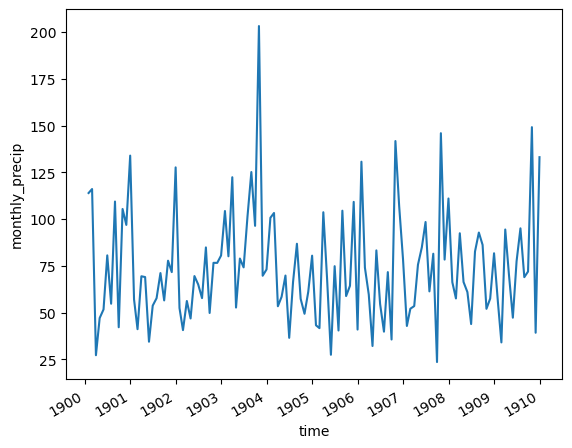

In [55]:
(precip_1900s.mean('site_index').resample(time='M').mean().monthly_precip*25.4).plot()   #converted from inches to mm

<p>This can be visually compared to <a href='https://github.com/ed-hawkins/rainfall-rescue/blob/master/REGIONAL-TIMESERIES/uk_rainfall.png'>UK monthly mean graphic on Github.</a></p>